In [1]:
#Anna Nagi
#zad 1

#rozwiązania
# dla b1:
# x=
#[1
# 40001]

#dla b2:
# x=
#[2
# 0]

#Pomiedzy tymi rozwiązaniami jest bardzo duża różnica

#Wspolczynnik uwarunkowania macierzy A = 2,0001*20001=40004,0001 - bardzo duza liczba

In [2]:
#zad 2
#import math
from scipy.linalg import hilbert
from numpy.linalg import inv
from numpy import transpose
from numpy import matmul
from numpy.linalg import eig
from math import sqrt

#tworze macierz hilberta 8x8
macierz = hilbert(8)
odwrocona = inv(macierz)

#----------------------------norma kolumnowa-----------------------------------
sumy_z_kolumn = []
for j in range(8):
    kol = macierz[:,j]
    suma=0
    for i in range(len(kol)):
        suma+=abs(kol[i])
    sumy_z_kolumn.append(suma)
norma_kolumnowa = max(sumy_z_kolumn)
 
sumy_z_kolumn = []
for j in range(8):
    kol = odwrocona[:,j]
    suma=0
    for i in range(len(kol)):
        suma+=abs(kol[i])
    sumy_z_kolumn.append(suma)
norma_kolumnowa_odw = max(sumy_z_kolumn)

wsp_uwarunk_norma1 = norma_kolumnowa * norma_kolumnowa_odw
print('\nWspolczynnik uwarunkowania dla normy kolumnowej: ')
print(wsp_uwarunk_norma1)


#--------------------------------norma spektralna----------------------------------
transponowana = transpose(macierz)
#mnozenie macierzy poczatkowej przez transponowana
wymnozona = matmul(macierz, transponowana)

#obliczam wartosci wlasne z macierzy wymnozonej potrzebne do promienia spektralnego
w,v = eig(wymnozona) #w-wartosci wlasne macierzy

bezwzgl_wart_wlasne =[]
for i in range(len(w)):
    bezwzgl_wart_wlasne.append(w[i])
    
promien_spektralny = max(bezwzgl_wart_wlasne)
norma_spektralna = sqrt(promien_spektralny)

#dla odwroconej
transponowana_odw = transpose(odwrocona)
wymnozona_odw = matmul(odwrocona, transponowana_odw)
w,v = eig(wymnozona_odw)
bezwzgl_wart_wlasne_odw =[]
for i in range(len(w)):
    bezwzgl_wart_wlasne_odw.append(w[i])

promien_spektralny_odw = max(bezwzgl_wart_wlasne_odw)
norma_spektralna_odw = sqrt(promien_spektralny_odw)

wsp_uwarunk_norma2 = norma_spektralna * norma_spektralna_odw
print('\nWspolczynnik uwarunkowania dla normy spektralnej: ')
print(wsp_uwarunk_norma2)


#-----------------------------------------norma wierszowa-------------------------------------------------------
sumy_z_wierszy = []
for j in range(8):
    kol = macierz[j,:]
    suma=0
    for i in range(len(kol)):
        suma+=abs(kol[i])
    sumy_z_wierszy.append(suma)
norma_wierszowa = max(sumy_z_wierszy)
 
sumy_z_wierszy = []
for j in range(8):
    kol = odwrocona[j,:]
    suma=0
    for i in range(len(kol)):
        suma+=abs(kol[i])
    sumy_z_wierszy.append(suma)
norma_wierszowa_odw = max(sumy_z_wierszy)

wsp_uwarunk_norma3 = norma_wierszowa * norma_wierszowa_odw
print('\nWspolczynnik uwarunkowania dla normy wierszowej: ')
print(wsp_uwarunk_norma3)

print('\n\nWartosci wspolczynnikow uwarunkowania tej macierzy sa bardzo duze, co oznacza, ze ta macierz jest zle uwarunkowana')



Wspolczynnik uwarunkowania dla normy kolumnowej: 
33872789110.107353

Wspolczynnik uwarunkowania dla normy spektralnej: 
15257574847.190962

Wspolczynnik uwarunkowania dla normy wierszowej: 
33872789109.757656


Wartosci wspolczynnikow uwarunkowania tej macierzy sa bardzo duze, co oznacza, ze ta macierz jest zle uwarunkowana


In [5]:
#zad 3 
from math import cos,sqrt
from scipy.linalg import solve_triangular
from numpy.linalg import qr,lstsq,solve
import time
from numpy import transpose,matmul,vander,linspace

n=20
t = linspace(0,1,n)

b= []
for i in t:
    x1 = 4*i
    b.append(cos(x1))
    
a = vander(t, n, increasing=True)


#--------------------------------------------solve--------------------------------------------------------
start1 = time.clock()
x_solve = solve(a, b)
stop1 = time.clock()
czas_solve = stop1-start1
print('Czas dla solve:')
print(czas_solve)

#---------------------------------------------qr----------------------------------------------------------
start2 = time.clock()
q, r = qr(a)

#y = QT * b                R*x = y
qT= transpose(q) 
y = matmul(qT, b)
x_qr = solve_triangular(r, y)
stop2 = time.clock()
czas_qr = stop2-start2
print('Czas dla QR:')
print(czas_qr)

#-------------------------------------------lstsq--------------------------------------------------------
start3 = time.clock()
x_lstsq = lstsq(a,b, None)[0]          #dla macierzy prostokatnej
stop3 = time.clock()
czas_lstsq = stop3-start3
print('Czas dla lstsq:')
print(czas_lstsq)

print('\nCzas solve < czas lstsq < czas QR')
print('Wniosek: metoda solve jest najszybsza z tych metod, a QR najwolniejsza')


#---------------------------- porownywanie jakosci wynikow ------------------

r_solve = b - matmul(a,x_solve)
norma_r_solve=0
for i in range(len(r_solve)):
    norma_r_solve += pow(r_solve[i],2)
norma_r_solve = sqrt(norma_r_solve)
print('\n\nNorma r dla solve: ')
print(norma_r_solve)

r_qr = b - matmul(a,x_qr)
norma_r_qr=0
for i in range(len(r_qr)):
    norma_r_qr += pow(r_qr[i],2)
norma_r_qr = sqrt(norma_r_qr)
print('Norma r dla qr: ')
print(norma_r_qr)

r_lstsq = b - matmul(a,x_lstsq)
norma_r_lstsq=0
for i in range(len(r_lstsq)):
    norma_r_lstsq += pow(r_lstsq[i],2)
norma_r_lstsq = sqrt(norma_r_lstsq)
print('Norma r dla lstsq: ')
print(norma_r_lstsq)

print('\n\nnorma solve < norma qr < norma lstsq')
print('Wniosek: metoda solve jest najdokladniejsza, a lstsq najmniej dokladna')


Czas dla solve:
0.00012129824574458326
Czas dla QR:
0.0007114608647498244
Czas dla lstsq:
0.0004054160599480383

Czas solve < czas lstsq < czas QR
Wniosek: metoda solve jest najszybsza z tych metod, a QR najwolniejsza


Norma r dla solve: 
3.659212394130439e-15
Norma r dla qr: 
4.1782052831214096e-15
Norma r dla lstsq: 
1.2353601060630957e-14


norma solve < norma qr < norma lstsq
Wniosek: metoda solve jest najdokladniejsza, a lstsq najmniej dokladna


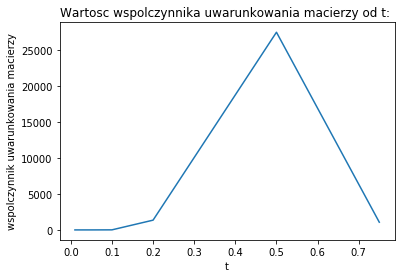

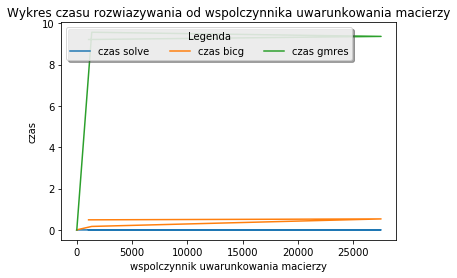

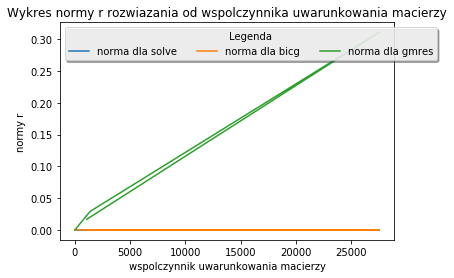

Im wieksze t, tym wieksza wartosc wspolczynnika uwarunkowania macierzy, ale tylko do pewnego t, a pozniej wartosc wspolczynnika uwarunkowania macierzy maleje wraz ze wzrostem t

czas solve < czas bicg < czas gmres
Najszybsza z wszystkich metod rozwiazywania jest metoda solve, a najwolniejsza gmres - jest ona znaczaco wolniejsza od pozostalych dwoch metod
Czas rozwiazywania rosnie wraz ze wzrostem wspolczynnika uwarunkowania macierzy, dla gmres bardzo drastyczneie

Najwieksza norma r wystepuje dla metody gmres, przez co jest ona rowniez najmniej dokladna z wszystkich metod rozwiazywania
Ponadto norma r wzrasta drastycznie dla gmres wraz ze wzrostem wspolczynnika uwarunkowania macierzy

Dla metod solve i bicg normy r sa na bardzo niskim poziomie, wiec rozwiazania te sa o wiele dokladniejsze.


In [10]:
#zad 4

#generujemy macierz 500x500, symetryczna( A = A^T )

from numpy.random import uniform
from numpy import ones,triu_indices,tril_indices, matmul
from numpy.linalg import cond, solve
import matplotlib.pyplot as plt
from time import clock
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import bicg,gmres
from math import sqrt

n=500

b= []
for i in range(n):
    b.append(uniform(-1,1))

A = (n,n)
losowe_liczby = uniform(-1,1,int(n*(n-1)/2)) #losuje liczby - tworze tablice, z ktorej potem bede brac liczby do macierzy

A = ones(A) #najpierw wypelniam cala macierz jedynkami
#wypelniam macierze trojkatna gorna i dolna odpowiednimi liczbami - oprocz diagonalnej, na ktorej maja byc jedynki, stad w indices(n, 1) i (n, -1)
A[triu_indices(n, 1)] = losowe_liczby 
A[tril_indices(n, -1)] = A.T[tril_indices(n, -1)] #musi byc symetryczna


x_solve=[]
czas_solve=[]
normy_r_solve=[]

x_bicg=[]
czas_bicg=[]
normy_r_bicg=[]

x_gmres=[]
czas_gmres=[]
normy_r_gmres=[]

t=[0.75, 0.5, 0.2, 0.1, 0.05, 0.01]
wsp_uw_macierzy = []

for k in range(len(t)):
    for i in range (n):
        for j in range (n):
            if i==j:
                continue  #na przekatnej maja byc nadal jedynki
            if abs(A[i][j]) > t[k]:
                A[i][j]=0
                
    wsp_uw_macierzy.append(cond(A))     
    start1 = clock()
    x_solve1 = solve(A, b)
    stop1 = clock()
    x_solve.append(x_solve1)
    czas_solve.append(stop1-start1)
    
    r_solve = b - matmul(A,x_solve1)
    norma_r_solve=0
    for i in range(len(r_solve)):
        norma_r_solve += pow(r_solve[i],2)
    norma_r_solve = sqrt(norma_r_solve)
    normy_r_solve.append(norma_r_solve)
    

    start2 = clock()
    rzadka1 = csr_matrix(A)
    x_bicg1, wyjscie = bicg(rzadka1, b)
    stop2 = clock()
    x_bicg.append(x_bicg1)
    czas_bicg.append(stop2-start2)
    
    r_bicg = b - matmul(A,x_bicg1)
    norma_r_bicg=0
    for i in range(len(r_bicg)):
        norma_r_bicg += pow(r_bicg[i],2)
    norma_r_bicg = sqrt(norma_r_bicg)
    normy_r_bicg.append(norma_r_bicg)
    
    
    start3 = clock()
    rzadka2 = csr_matrix(A).toarray()
    x_gmres2, wyjscie1 = gmres(rzadka2, b)
    stop3 = clock()
    x_gmres.append(x_gmres2)
    czas_gmres.append(stop3-start3)
    
    r_gmres = b - matmul(A,x_gmres2)
    norma_r_gmres=0
    for i in range(len(r_gmres)):
        norma_r_gmres += pow(r_gmres[i],2)
    norma_r_gmres = sqrt(norma_r_gmres)
    normy_r_gmres.append(norma_r_gmres)




plt.plot(t, wsp_uw_macierzy)
plt.title('Wartosc wspolczynnika uwarunkowania macierzy od t: ')
plt.xlabel('t')
plt.ylabel('wspolczynnik uwarunkowania macierzy')

plt.figure()
plt.title('Wykres czasu rozwiazywania od wspolczynnika uwarunkowania macierzy')
plt.plot(wsp_uw_macierzy, czas_solve, label="czas solve")
plt.plot(wsp_uw_macierzy, czas_bicg, label="czas bicg")
plt.plot(wsp_uw_macierzy, czas_gmres, label="czas gmres")
plt.xlabel('wspolczynnik uwarunkowania macierzy')
plt.ylabel('czas')
plt.legend(loc="upper left", bbox_to_anchor=[0, 1],
           ncol=3, shadow=True, title="Legenda")


plt.figure()
plt.title('Wykres normy r rozwiazania od wspolczynnika uwarunkowania macierzy')
plt.plot(wsp_uw_macierzy, normy_r_solve, label="norma dla solve")
plt.plot(wsp_uw_macierzy, normy_r_bicg, label="norma dla bicg")
plt.plot(wsp_uw_macierzy, normy_r_gmres, label="norma dla gmres")
plt.xlabel('wspolczynnik uwarunkowania macierzy')
plt.ylabel('normy r')
plt.legend(loc="upper left", bbox_to_anchor=[0, 1],
           ncol=3, shadow=True, title="Legenda")
plt.show()

print('Im wieksze t, tym wieksza wartosc wspolczynnika uwarunkowania macierzy, ale tylko do pewnego t, a pozniej wartosc wspolczynnika uwarunkowania macierzy maleje wraz ze wzrostem t')
print('\nczas solve < czas bicg < czas gmres')
print('Najszybsza z wszystkich metod rozwiazywania jest metoda solve, a najwolniejsza gmres - jest ona znaczaco wolniejsza od pozostalych dwoch metod')
print('Czas rozwiazywania rosnie wraz ze wzrostem wspolczynnika uwarunkowania macierzy, dla gmres bardzo drastyczneie')
print('\nNajwieksza norma r wystepuje dla metody gmres, przez co jest ona rowniez najmniej dokladna z wszystkich metod rozwiazywania')
print('Ponadto norma r wzrasta drastycznie dla gmres wraz ze wzrostem wspolczynnika uwarunkowania macierzy')
print('\nDla metod solve i bicg normy r sa na bardzo niskim poziomie, wiec rozwiazania te sa o wiele dokladniejsze.')



In [11]:
#zad 5 
# iteracyjna metoda gaussa - siedla

from numpy import tril, triu, matmul, array
from scipy.linalg import solve
from numpy.linalg import inv,eig
from math import sqrt

def gauss(A, b):
    L = tril(A,-1) #poddiagonalna
    U = triu(A, 1) #naddiagonalna
    D = A - L - U #diagonalna
    
    dokladnosc=0.000001  #im mniejsza liczba, tym bardziej wynik bedzie zblizony do wyniku metody solve

    macierz_GS = matmul(-inv((L+D)), U)# ze wzoru
    
    #wyznaczam promien spektralny macierzy gaussa-seidla
    w,v = eig(macierz_GS) #w-wartosci wlasne macierzy
    
    bezwzgl_wart_wlasne =[]
    for i in range(len(w)):
        bezwzgl_wart_wlasne.append(w[i])
        
    promien_spektralny = max(bezwzgl_wart_wlasne)
    print('promien spektralny: ')
    print(promien_spektralny)
    #sprawdzam warunek zbieznosci
    if(promien_spektralny>=1):
        print('Warunek zbieznosci nie jest spelniony, nie mozna zastosowac tej metody')
        return None
    
    xk= [1,1,1]  #przyjmujemy wektor startowy
    k=0  #ilosc iteracji
    
    while True:
        xk1 = matmul(matmul(-inv((L+D)),U),xk)+ matmul(inv((L+D)),b)
        roznica = xk1 - xk
    
        #norma kolumnowa
        abs_roznica = abs(roznica)
        norma = max(abs_roznica)
        
        #warunek stopu
        if(norma < dokladnosc):
            return xk1
        
        xk=xk1
        k=k+1


A1 = array([[4.0, -2.0, 8.0], [6.0, -4.0, 2.0], [-6.0, 4.0, 5.0]])
b1 = [1.0, 5.0, 7.0]

print('Dla A1, b1:')
x_gauss = gauss(A1,b1)
x_solve = solve(A1,b1)
print('gauss: ')
print (x_gauss)
print('solve: ')
print (x_solve)

r_gauss = b1 - matmul(A1,x_gauss)
norma_r_gauss=0
for i in range(len(r_gauss)):
    norma_r_gauss += pow(r_gauss[i],2)
norma_r_gauss = sqrt(norma_r_gauss)
print('Norma r dla gauss: ')
print(norma_r_gauss)

r_solve = b1 - matmul(A1,x_solve)
norma_r_solve=0
for i in range(len(r_solve)):
    norma_r_solve += pow(r_solve[i],2)
norma_r_solve = sqrt(norma_r_solve)
print('Norma r dla solve: ')
print(norma_r_solve)


A = array([[1, 2, 3], [2, 1, 3], [3, 2, 1]])
b = [1.0, 2.0, 0.0] 

print('\n\nDla A, b z tresci zadania:')
x_gauss1 = gauss(A,b)
x_solve1 = solve(A,b)

if (x_gauss1!=None):
    print('gauss: ')
    print (x_gauss1)

    r_gauss1 = b - matmul(A,x_gauss1)
    norma_r_gauss1=0
    for i in range(len(r_gauss1)):
        norma_r_gauss1 += pow(r_gauss1[i],2)
    norma_r_gauss1 = sqrt(norma_r_gauss1)
    print('Norma r dla gauss: ')
    print(norma_r_gauss1)
    
    

print('solve: ')
print (x_solve1)

r_solve1 = b - matmul(A,x_solve1)
norma_r_solve1=0
for i in range(len(r_solve1)):
    norma_r_solve1 += pow(r_solve1[i],2)
norma_r_solve1 = sqrt(norma_r_solve1)
print('Norma r dla solve1: ')
print(norma_r_solve1)

print('\nDla A i b dla ktorych metoda gaussa-seidla jest zbiezna przy uzyciu tej metody norma r jest wyzsza, niz przy uzyciu metody solve, wiec metoda gaussa-seidla daje mniej wykladne wyniki niz solve')
print('\nNie mozna porownac jakosci rozwiazania dla podanego w tresci A i b, bo metoda gaussa-seidla nie jest dla nich zbiezna')



Dla A1, b1:
promien spektralny: 
0.75
gauss: 
[-13.49999844 -20.6428548    1.71428571]
solve: 
[-13.5        -20.64285714   1.71428571]
Norma r dla gauss: 
1.5586409318757433e-06
Norma r dla solve: 
3.076740298213702e-15


Dla A, b z tresci zadania:
promien spektralny: 
(3.5000000000000004+2.3979157616563596j)
Warunek zbieznosci nie jest spelniony, nie mozna zastosowac tej metody
solve: 
[ 0.25 -0.75  0.75]
Norma r dla solve1: 
2.220446049250313e-16

Dla A i b dla ktorych metoda gaussa-seidla jest zbiezna przy uzyciu tej metody norma r jest wyzsza, niz przy uzyciu metody solve, wiec metoda gaussa-seidla daje mniej wykladne wyniki niz solve

Nie mozna porownac jakosci rozwiazania dla podanego w tresci A i b, bo metoda gaussa-seidla nie jest dla nich zbiezna
